In [288]:
%load_ext autoreload
%autoreload 2
    
import utils

# viz
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
from matplotlib import colors

from typing import List
from collections import namedtuple
from collections import defaultdict
import numpy as np
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1

Find the best asteroid, defined as being the one with the most other asteroids visible using line of sight calculation.

In [698]:
def get_angle(p1, p2, numpy=True):
    """returns angle b/w p1 and p2, assuming p1 is the origin"""
    if numpy:
        y = p2[0] - p1[0]
        x = p2[1] - p1[1]
    else:
        x = p2[0] - p1[0]
        y = p2[1] - p1[1]
    if y == x == 0: # points are the same
        return False
    return math.degrees(math.atan2(y, x)) % 360

In [703]:
inp = parse_inp(inp1)
positions = get_asteroids(inp)
positions

array([[2, 0],
       [0, 1],
       [2, 1],
       [2, 2],
       [2, 3],
       [4, 3],
       [0, 4],
       [2, 4],
       [3, 4],
       [4, 4]])

In [706]:
print(inp1)

.#..#
.....
#####
....#
...##


In [712]:
inp[0][-2]

'.'

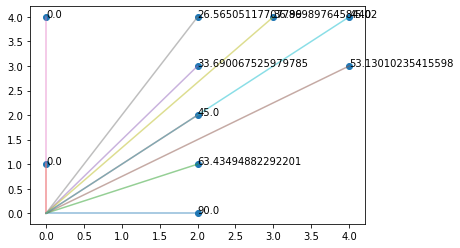

In [707]:
X = np.random.randint(-1, 2, (15,2))
x, y = positions[:,0], positions[:,1]
plt.scatter(x, y);
for x, y in zip(x,y):
    plt.plot([0, x] , [0, y], alpha=0.5)
    angle = get_angle((0,0), (x,y), True)
    plt.annotate(f"{angle}", (x,y))

In [657]:
x, y = 0, 1
rad = math.atan2(y, x)
math.degrees(rad), math.degrees(rad) % 360

(90.0, 90.0)

In [625]:
-135 % 360

225

In [619]:
p1 = [0,0]; p2 = [-1,-1]
get_angle(p1, p2)

225.0

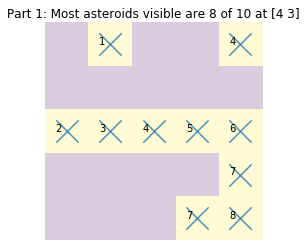

Part 1: Most asteroids visible are 33 of 40 at [8 5]
Part 1: Most asteroids visible are 34 of 40 at [2 1]


AssertionError: 

In [595]:
inp1 = """.#..#
.....
#####
....#
...##"""

inp2 = """......#.#.
#..#.#....
..#######.
.#.#.###..
.#..#.....
..#....#.#
#..#....#.
.##.#..###
##...#..#.
.#....####"""

inp3 = """#.#...#.#.
.###....#.
.#....#...
##.#.#.#.#
....#.#.#.
.##..###.#
..#...##..
..##....##
......#...
.####.###."""

inp4 = """.#..##.###...#######
##.############..##.
.#.######.########.#
.###.#######.####.#.
#####.##.#.##.###.##
..#####..#.#########
####################
#.####....###.#.#.##
##.#################
#####.##.###..####..
..######..##.#######
####.##.####...##..#
.#####..#.######.###
##...#.##########...
#.##########.#######
.####.#.###.###.#.##
....##.##.###..#####
.#.#.###########.###
#.#.#.#####.####.###
###.##.####.##.#..##"""

def parse_inp(inp=None, day=10):
    if not inp:
        inp = utils.get_input(day)
    return np.array([[c for c in row] for row in inp.splitlines()])

def get_asteroids(grid):
    positions = []
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            pos = (j,i)
            if grid[pos] == "#":
                positions.append(pos)
    return np.array(positions)

def get_angle(p1, p2):
    """returns angle b/w p1 and p2, assuming p1 is the origin"""
    x = p2[0] - p1[0]
    y = p2[1] - p1[1]
    if y == x == 0: # points are the same
        return False
    return math.degrees(math.atan2(y, x)) % 360

def get_unique_angles(p1, positions):
    angles = set()
    for pos in positions:
        angle = get_angle(p1, pos)
        if angle:
            angles.add(angle)
    return angles

def solve_1(inp=None, viz=False):
    inp = parse_inp(inp)
    positions = get_asteroids(inp)
    
    angle_max = 0
    best_asteroid = None
    
    for p in positions:
        angles = get_unique_angles(p, positions)
        sum_angles = len(angles)
        if sum_angles > angle_max:
            angle_max = sum_angles
            best_asteroid = p
    
    title=f"Part 1: Most asteroids visible are {angle_max} of {len(positions)} at {best_asteroid}"
    if viz: 
        plot(inp, positions, title)
    else:
        print(title)
    return angle_max, best_asteroid, positions
    
assert solve_1(inp1, viz=True)[0] == 8  # pos (3,4)  
assert solve_1(inp2)[0] == 33 # pos (5,8)
assert solve_1(inp3)[0] == 35 # pos (1,2)
assert solve_1(inp4)[0] == 210 # pos (1,2)

visible, best_asteroid, pos = solve_1()

# Part 2 - Lasers!

Destroy all the asteroids! We have a giant laser on our best asteroid, which starts by pointing straight up, rotates clockwise, and vaporizes one asteroid per hit as it rotates.

This should be straightforward, as we already know the best asteroid from part 1 

In [344]:
inp21 = """.#....#####...#..
##...##.#####..##
##...#...#.#####.
..#.....#...###..
..#.#.....#....##"""

In [505]:
math.degrees(math.atan2(1,0))

90.0

In [504]:
math.atan2(-1,0) / math.pi

-0.5

In [581]:
from itertools import islice, cycle

def get_all_asteroids(pos, positions):
    angles = defaultdict(list) 
    
    # get all asteroids visible from a position
    for pos in (positions - pos): # taking pos as the origin
        x, y = pos
        if x == y == 0: # skip itself
            continue
        angle = math.degrees(math.atan2(y, x))
        angles[angle].append(pos)
    
    # sort asteroids by distance from pos
    for angle, asteroids in angles.items():
        angles[angle] = sorted(asteroids, key= lambda x: (abs(x[0]), abs(x[1])))
        
    return angles

def score(kills, num):
    pos = kills[num-1]
    y, x = pos
    score = (x * 100) + y
    print(f"{num} asteroid killed is {pos} or {x,y} with score {score}")
    return score

def solve_2(inp=None, kill_number=200):
    
    visible, best_asteroid, positions = solve_1(inp)
    asteroids = get_all_asteroids(best_asteroid, positions)
    
    kills = []
    angles_ordered = sorted(asteroids.keys())
    #print(angles_ordered)

    up = math.degrees(math.atan2(0.01,-1)) # angle for straightup
    print(f"up {up}")
    
    idx = [i for i, angle in enumerate(angles_ordered) if angle > up][0]
    print(f"Starting at {idx} angle of total {len(angles_ordered)} angles")

    kill_order = islice(cycle(angles_ordered), idx, None)

    while len(kills) < len(positions)-1:
        angle = next(kill_order)
        if len(asteroids[angle]) > 0:
            ast = asteroids[angle][0]
            asteroids[angle] = asteroids[angle][1:] 
            kills.append(ast)

    score(kills, kill_number)
    return kills

# inp4 ans is 802 at pos(8,2)
kills = solve_2(inp4) # (11,12), (12,1) ..200th(8,2).. (11, 1)
kills[:10]

Part 1: Most asteroids visible are 210 of 300 at [13 11]
up 179.42706130231653
Starting at 209 angle of total 210 angles
200 asteroid killed is [-8  2] or (2, -8) with score 192


[array([-1,  0]),
 array([-12,  -1]),
 array([-11,  -1]),
 array([-10,  -1]),
 array([-7, -1]),
 array([-13,  -2]),
 array([-6, -1]),
 array([-5, -1]),
 array([-9, -2]),
 array([-13,  -3])]

In [582]:
k = solve_2()

Part 1: Most asteroids visible are 329 of 397 at [31 25]
up 179.42706130231653
Starting at 328 angle of total 329 angles
200 asteroid killed is [ -3 -14] or (-14, -3) with score -1403


In [583]:
k[:10]

[array([-13,   0]),
 array([-29,  -1]),
 array([-27,  -1]),
 array([-25,  -1]),
 array([-20,  -1]),
 array([-19,  -1]),
 array([-29,  -2]),
 array([-13,  -1]),
 array([-25,  -2]),
 array([-12,  -1])]

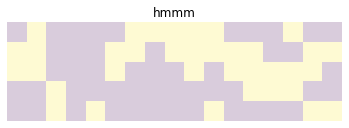

In [302]:
plot(parse_inp(inp21))

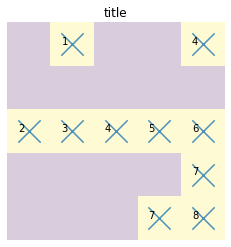

In [579]:
inp = parse_inp(inp1)
positions = get_asteroids(inp)
    
def plot(grid, positions=None, title="title"):
    """takes in a pattern as a string and plots it"""
    binary_grid = [c == "#" for c in [row for row in grid]]
    
    # show image
    plt.imshow(binary_grid, alpha=0.2)
    plt.title(f"{title}")
    plt.axis('off')
    
    # plot asteroids
    yy, xx = zip(*positions)
    plt.scatter(xx, yy, marker="x", s=500, alpha=0.8)
    
    # show visible asteroids from each position
    for x, y in zip(xx,yy):
        plt.annotate(f"{x+y}", (x-0.25,y))
    
    plt.show()
    
plot(inp, positions)